In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)

## Data Set Overview

**Load the data**

In [2]:
# Read the data
mydata = pd.read_csv("C:/Users/Manas/Downloads/Bike-Sharing-Demand-Prediction-master/Bike-Sharing-Demand-Prediction-master/Data/train.csv", parse_dates=True, index_col='datetime')
testdata = pd.read_csv("C:/Users/Manas/Downloads/Bike-Sharing-Demand-Prediction-master/Bike-Sharing-Demand-Prediction-master/Data/test.csv", parse_dates=True, index_col='datetime')

### Shape of the Data

In [3]:
mydata.shape

(10886, 11)

The provided data consists of over 10k observations with 11 column variables (excluding the datetime column - which has been used as an index)

### First Few Observations

In [4]:
mydata.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Feature Data Types

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


Data consists of 12 columns variables and all of them are Numeric Columns. 

### Feature Statistics Summary 
Below table provides the statistical details for each column. 

In [6]:
mydata.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
mydata.index[[0, -1]] # Range of time stamp

DatetimeIndex(['2011-01-01 00:00:00', '2012-12-19 23:00:00'], dtype='datetime64[ns]', name='datetime', freq=None)

In [8]:
mydata.casual  
mydata.registered 
mydata['count'].any()

True

### Summary

The below table summarizes the column content for the data

| Column Name | Format | Range | Explanation |
|-|-|-|-|
| datetime | yyyy-mm-dd hh:mm:ss | 2011-01-01 00:00:00 to<br>2012-12-19 23:00:00 | hourly date + time stamp|
| season | int64 | 1 to 4 | 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter |
| holiday | int64 | 0 or 1 | 1 = Holiday, 0 = Not a Holiday |
| workingday | int64 | 0 or 1 | 1 = Neither a weekend nor holiday, 0 = Either a weekend or a holiday |
| weather | int64 | 1 to 4 | 1 = Clear, Few clouds, Partly cloudy, Partly cloudy <br> 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br> 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  <br> 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| temp | float64 | -0.82 to 41 | Temperature in Celsius | 
| atemp | float64 | 0.76 to 45.46 | 'Feels like" temperature in Celsius |
| humidity | int64 | 0 to 100 | Relative humidity | 
| windspeed | float64 | 0 to 57 | Wind Speed | 
| casual | int64 | 0 to 367 | Number of non-registered user rentals initiated | 
| registered | int64 | 0 to 886 | Number of registered user rentals initiated |
| count | int64 | 1 to 977 | Number of total rentals (casual + registered) |





# EDA

## Data Distribution Visualization - Part 1

### Categorical Data Conversion

From the above set of 8 variables, we notice that the 4 of those columns ['season', 'holiday', 'workingday', 'weather'] should be category data types.  Converting these 4 features to categories

In [9]:
# Converting into categorical data
category_list = ['season', 'holiday', 'workingday', 'weather']
for var in category_list:
    mydata[var] = mydata[var].astype('category')
    testdata[var] = testdata[var].astype('category')

In [10]:
# Mapping numbers to understandable text
season_dict = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
weather_dict = {1:'Clear', 2:'Misty+Cloudy', 3:'Light Snow/Rain', 4:'Heavy Snow/Rain'}
mydata['season'] = mydata['season'].map(season_dict)
mydata['weather'] = mydata['weather'].map(weather_dict)

testdata['season'] = testdata['season'].map(season_dict)
testdata['weather'] = testdata['weather'].map(weather_dict)

mydata.head(n=3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32


### Distribution vs. Weather, Season, Working Day 
Let us see how 'count' = number of bikes rented varies across the various categorical data (weather, season, working day)

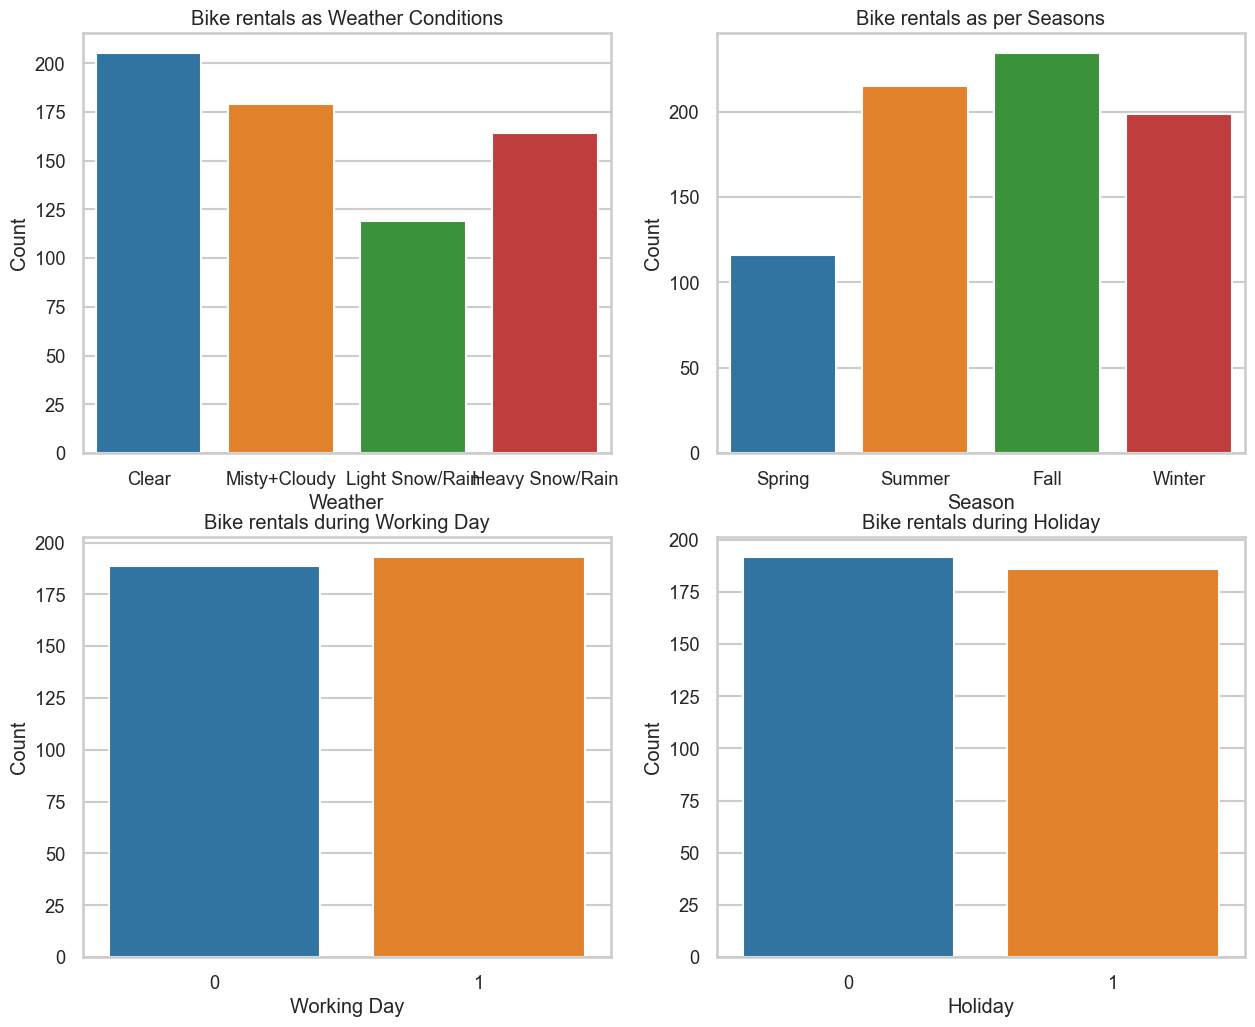

In [11]:
# Average values across each of the categorical columns 
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 1)
group_weather = pd.DataFrame(mydata.groupby(['weather'])['count'].mean()).reset_index()
sns.barplot(data=group_weather, x='weather', y='count', ax=axes)
axes.set(xlabel='Weather', ylabel='Count', title='Bike rentals as Weather Conditions')

axes = fig.add_subplot(2, 2, 2)
group_season = pd.DataFrame(mydata.groupby(['season'])['count'].mean()).reset_index()
sns.barplot(data=group_season, x='season', y='count', ax=axes)
axes.set(xlabel='Season', ylabel='Count', title='Bike rentals as per Seasons')

axes = fig.add_subplot(2, 2, 3)
group_workingday = pd.DataFrame(mydata.groupby(['workingday'])['count'].mean()).reset_index()
sns.barplot(data=group_workingday, x='workingday', y='count', ax=axes)
axes.set(xlabel='Working Day', ylabel='Count', title='Bike rentals during Working Day')

axes = fig.add_subplot(2, 2, 4)
group_season = pd.DataFrame(mydata.groupby(['holiday'])['count'].mean()).reset_index()
sns.barplot(data=group_season, x='holiday', y='count', ax=axes)
axes.set(xlabel='Holiday', ylabel='Count', title='Bike rentals during Holiday')
plt.show()

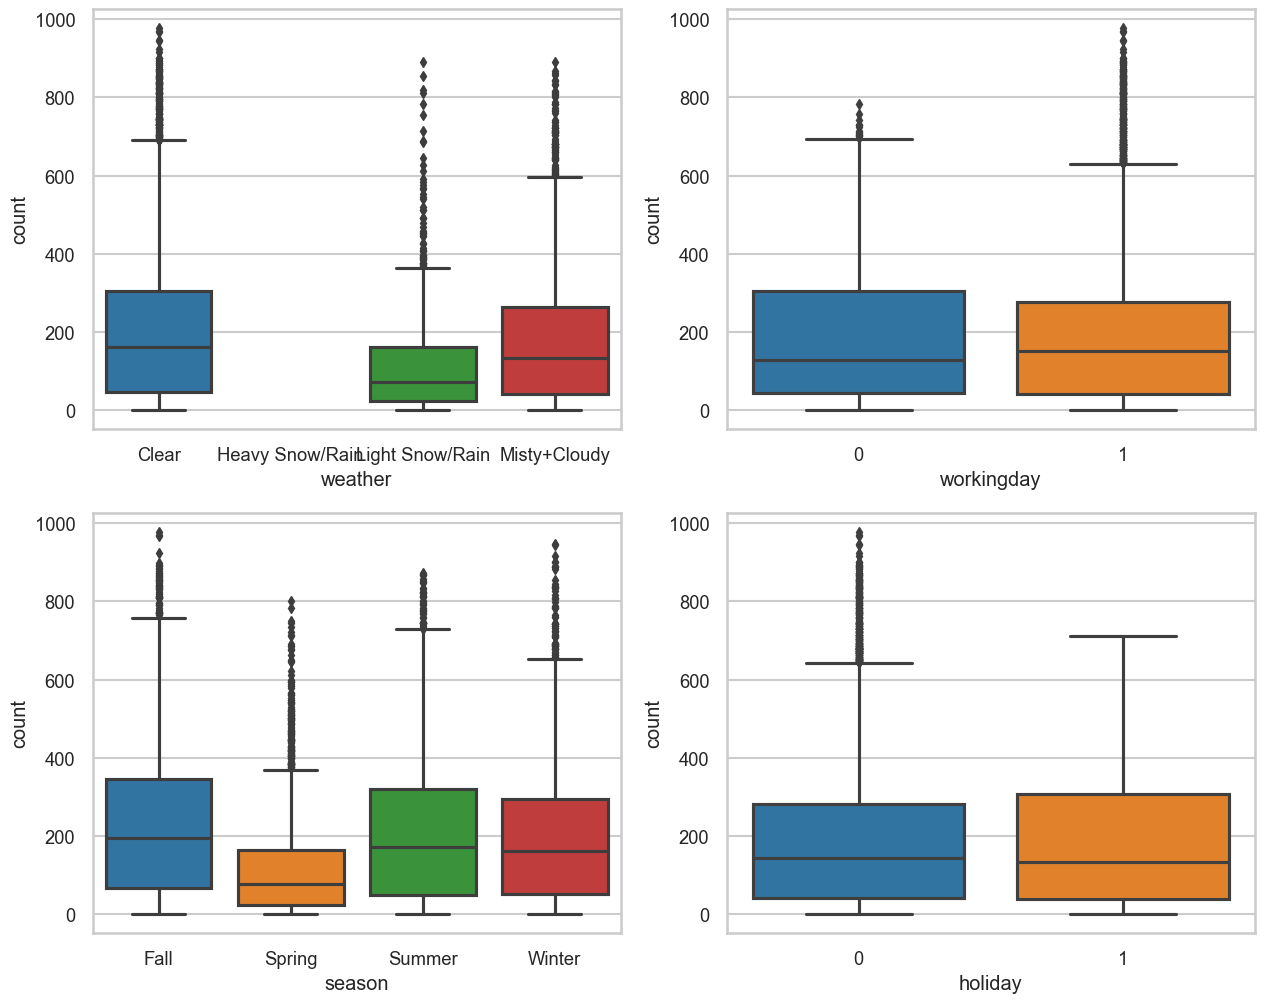

In [40]:
f, axes = plt.subplots(2, 2, figsize=(15, 12))
hue_order= ['Clear', 'Heavy Snow/Rain', 'Light Snow/Rain', 'Misty+Cloudy']
sns.boxplot(data=mydata, y='count', x='weather', ax=axes[0][0], order=hue_order)
sns.boxplot(data=mydata, y='count', x='workingday', ax=axes[0][1])
hue_order= ['Fall', 'Spring', 'Summer', 'Winter']
sns.boxplot(data=mydata, y='count', x='season', ax=axes[1][0], order=hue_order)
sns.boxplot(data=mydata, y='count', x='holiday', ax=axes[1][1])

plt.show()

Using seaborn boxplots to get an idea of the distribution and outliers acorss various categorical features 

**Few Observations**
+ Higher biker rentals as weather is more clear and sunny. 
+ Just '1 hour' instance where there were rentals under heavy rain/snow condition. Two possibilities
    + Could be an outlier
    + Reservations made at a time when the weather was good. But weather conditions logged sometime later in the same hour when the conditions were heavy rains/snow
+ Bike reservations are lesser in Spring season compared to Summer and Fall
+ Lots of outlier points for a particular seasons or weather conditions. This is most likely due to variable distribution across the day

### Distribution vs. Temperature 
Now let us see how number of bikes rented depends on the temperature

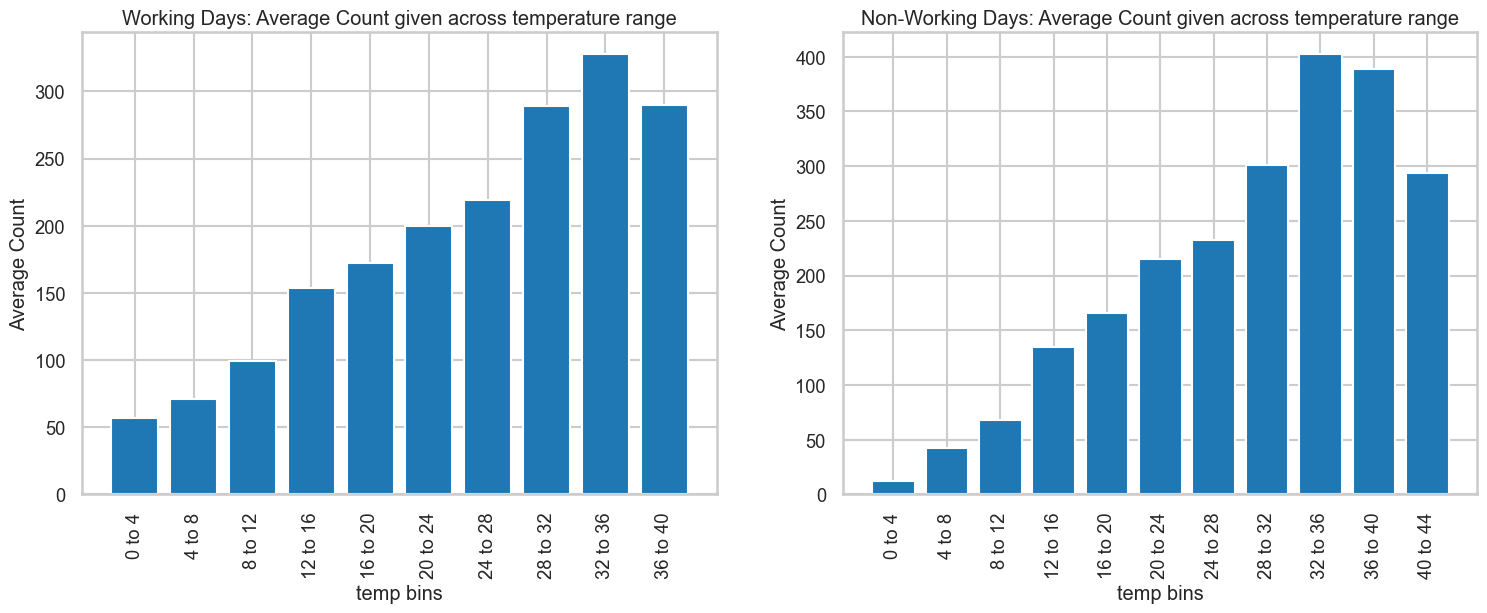

In [12]:
# Splitting data into working-day and non-working day
mydata_w = mydata[mydata.workingday==1]
mydata_nw = mydata[mydata.workingday==0]

bin_size = 4
mydata_w['temp_round'] = mydata_w['temp']//bin_size
mydata_nw['temp_round'] = mydata_nw['temp']//bin_size

mean_count_vs_temp_w = mydata_w.groupby('temp_round')['count'].mean()
mean_count_vs_temp_nw = mydata_nw.groupby('temp_round')['count'].mean()
idx_w, idx_nw = range(len(mean_count_vs_temp_w)), range(len(mean_count_vs_temp_nw))
labels_w = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(len(mean_count_vs_temp_w))]
labels_nw = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(len(mean_count_vs_temp_nw))]

fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
plt.bar(x=idx_w, height=mean_count_vs_temp_w)
plt.xticks(idx_w, labels_w, rotation=90)
plt.xlabel('temp bins')
plt.ylabel('Average Count')
plt.title('Working Days: Average Count given across temperature range')

axes = fig.add_subplot(1, 2, 2)
plt.bar(x=idx_nw, height=mean_count_vs_temp_nw)
plt.xticks(idx_nw, labels_nw, rotation=90)
plt.xlabel('temp bins')
plt.ylabel('Average Count')
plt.title('Non-Working Days: Average Count given across temperature range')

plt.show()

<AxesSubplot: >

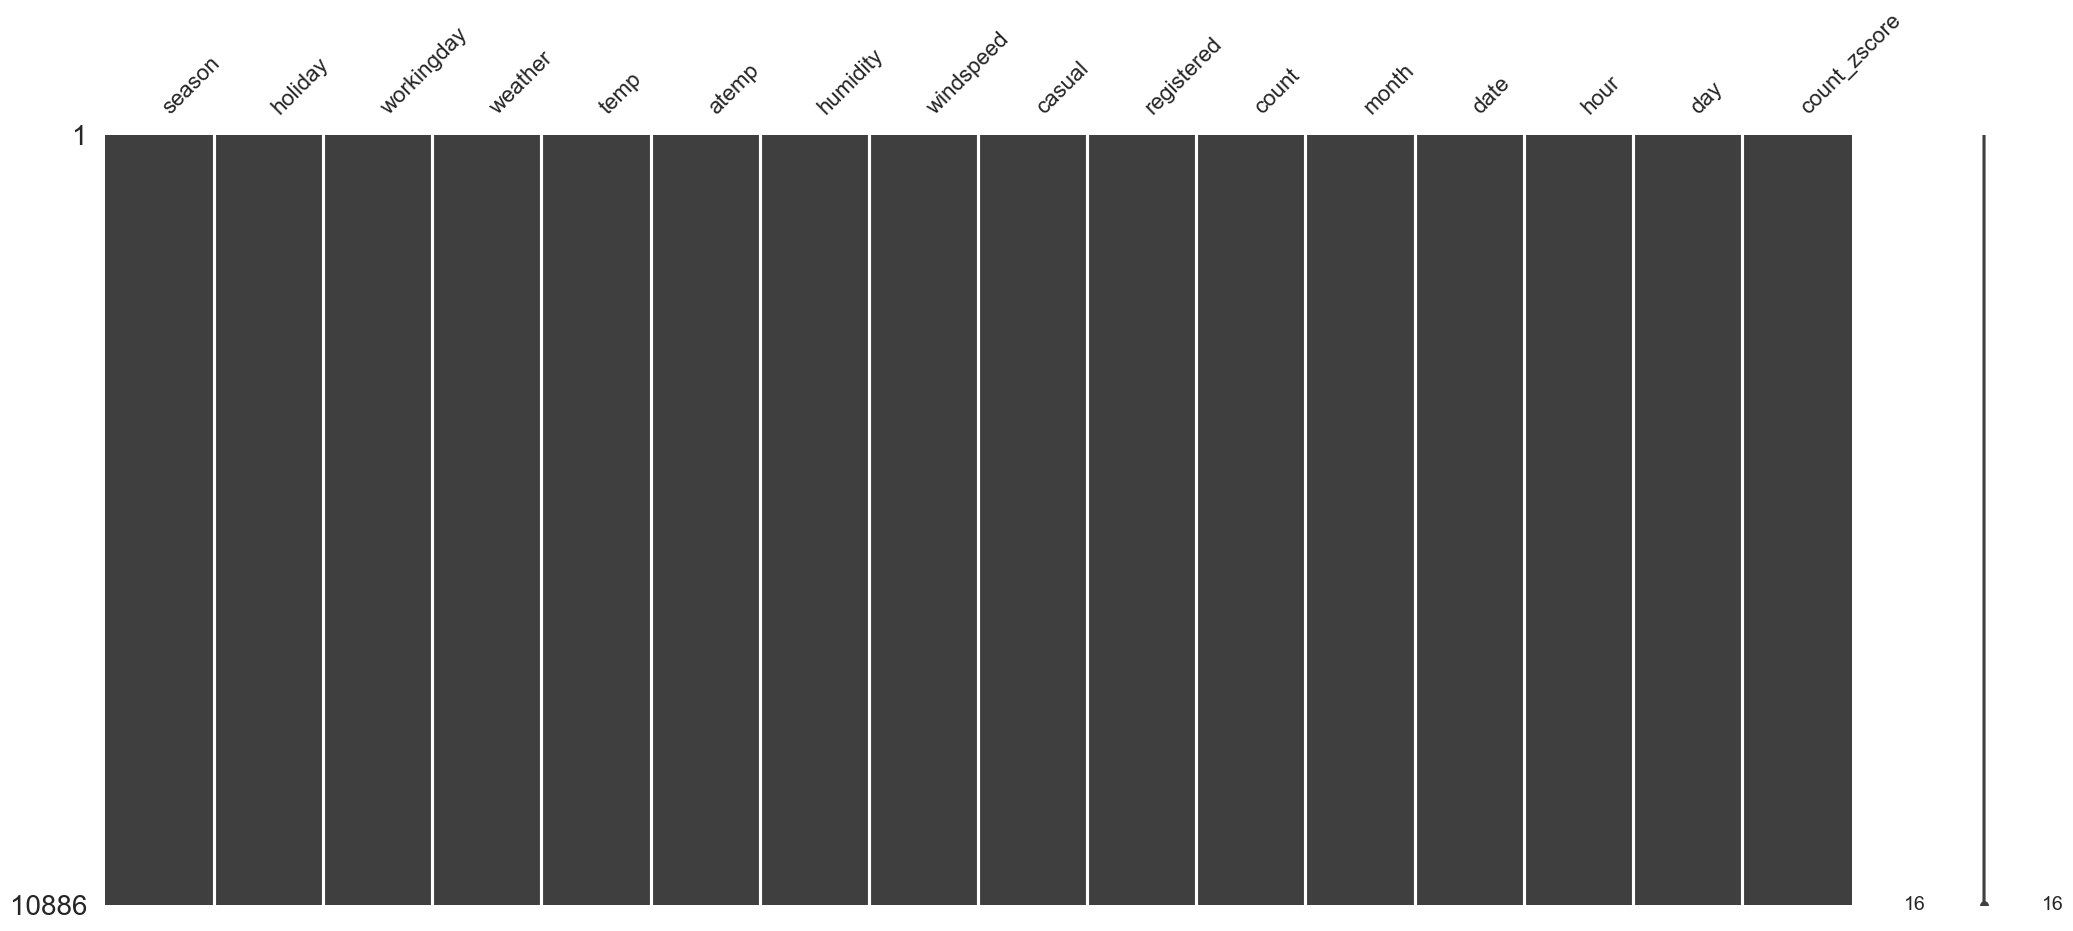

In [39]:
msno.matrix(mydata)

**Observation**
* From the above histogram plot, we can see that there is a steady increase in the average bikes rented with temperature with a small decrease at the highest temperature bin

## Feature Engineering 

Lets, split the datetime column into ['month', 'date', 'day', 'hour'] categories since the bike demand is more likely dependent on these individual categories. Creating these 4 additional category columns 

In [13]:
# Splitting datetime object into month, date, hour and day category columns
mydata['month'] = [x.month for x in mydata.index]
mydata['date'] = [x.day for x in mydata.index]
mydata['hour'] = [x.hour for x in mydata.index]
mydata['day'] = [x.weekday() for x in mydata.index]

testdata['month'] = [x.month for x in testdata.index]
testdata['date'] = [x.day for x in testdata.index]
testdata['hour'] = [x.hour for x in testdata.index]
testdata['day'] = [x.weekday() for x in testdata.index]

category_list = ['month', 'date', 'hour', 'day']
for var in category_list:
    mydata[var] = mydata[var].astype('category')
    testdata[var] = testdata[var].astype('category')

Mapping 0 to 6 day indices to Monday to Saturday 

In [14]:
# Mapping 0 to 6 day indices to Monday to Saturday 
day_dict = {0:'Monday', 1:'Teusday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
mydata['day'] = mydata['day'].map(day_dict)
testdata['day'] = testdata['day'].map(day_dict)

mydata.head(n=3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,date,hour,day
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,1,1,0,Saturday
2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,1,1,1,Saturday
2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,1,1,2,Saturday


## Data Distribution Visualization 

Now that we have separated out the hour data, let us plot the distribution across hour in a day. Clearly, we expect to see some pattern in the distribution - for example, people would tend to rent bikes early in the morning and return them in the evening. 

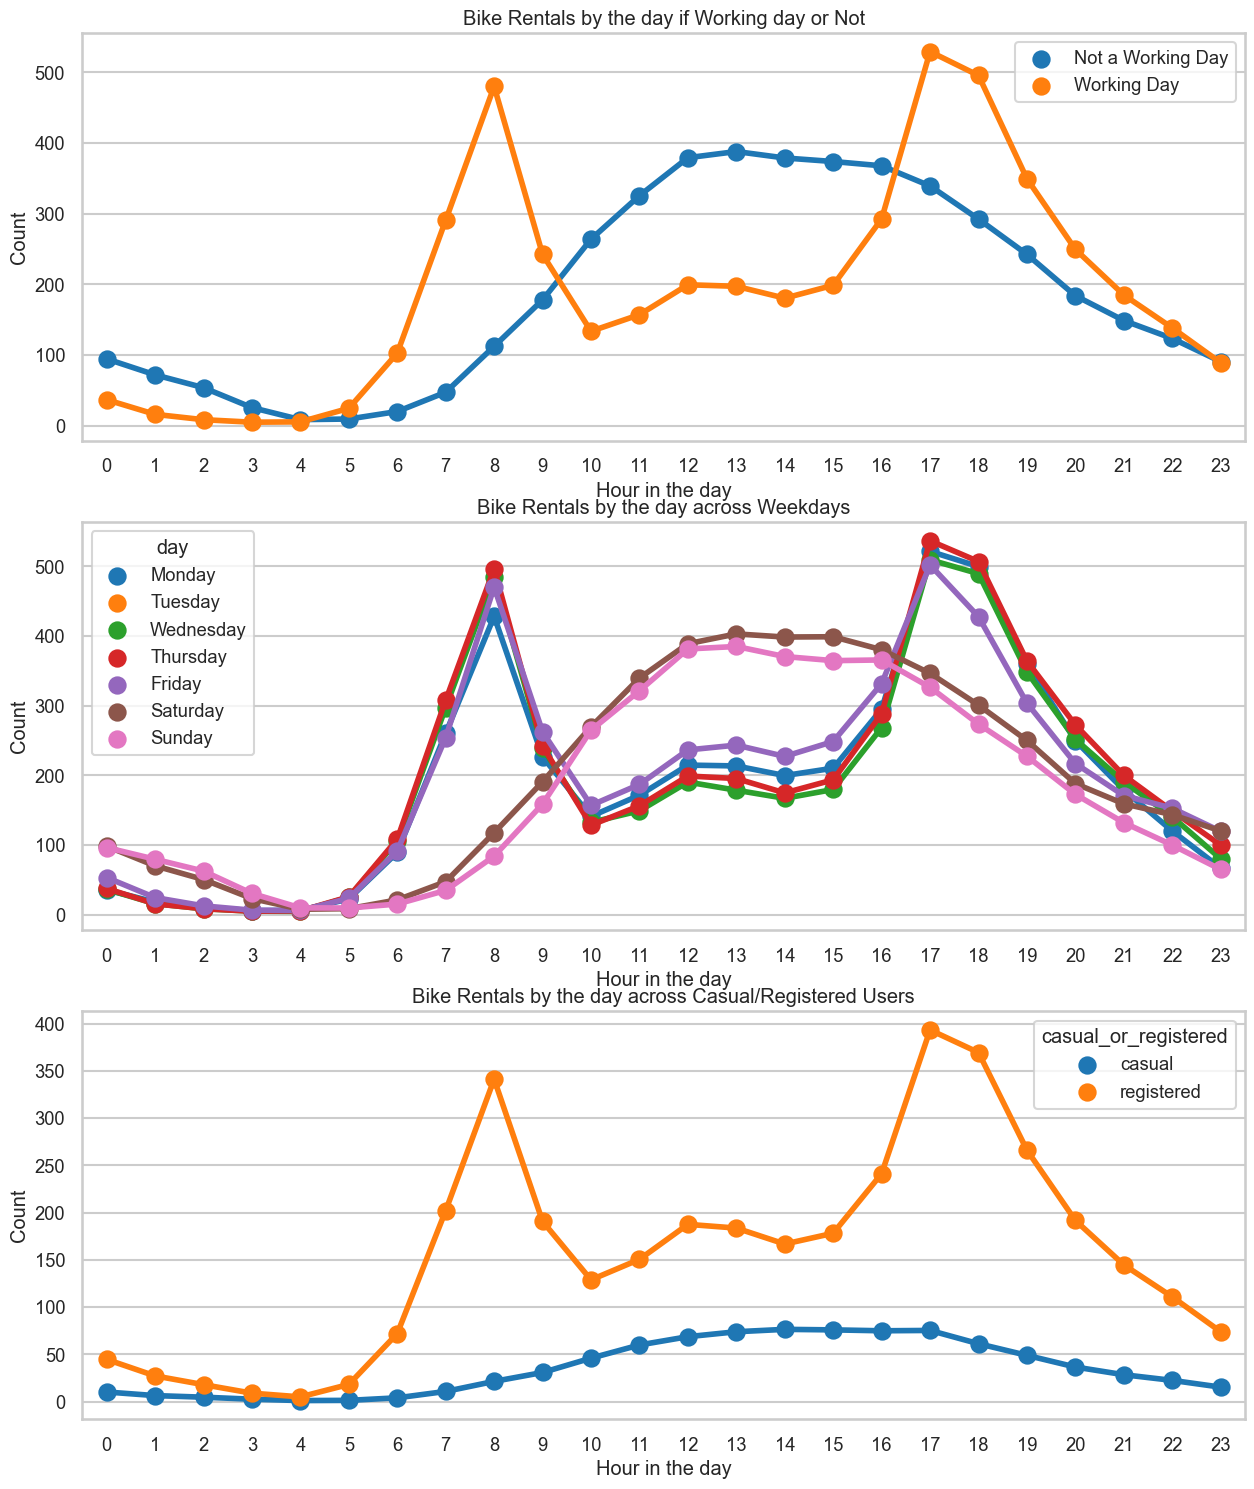

In [15]:
# Plots of average count across hour in a day for various categories

f, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 18))
group_work_hour = pd.DataFrame(mydata.groupby(['workingday', 'hour'])['count'].mean()).reset_index()
sns.pointplot(data=group_work_hour, x='hour', y='count', hue='workingday', ax=axes[0])
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ['Not a Working Day', 'Working Day'])
axes[0].set(xlabel='Hour in the day', ylabel='Count', title='Bike Rentals by the day if Working day or Not')

hue_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
group_day_hour = pd.DataFrame(mydata.groupby(['day', 'hour'])['count'].mean()).reset_index()
sns.pointplot(data=group_day_hour, x='hour', y='count', hue='day', ax=axes[1], hue_order=hue_order)
axes[1].set(xlabel='Hour in the day', ylabel='Count', title='Bike Rentals by the day across Weekdays')

df_melt = pd.melt(frame=mydata, id_vars='hour', value_vars=['casual', 'registered'], value_name='count', var_name='casual_or_registered')
group_casual_hour = pd.DataFrame(df_melt.groupby(['hour', 'casual_or_registered'])['count'].mean()).reset_index()
sns.pointplot(data=group_casual_hour, x='hour', y='count', hue='casual_or_registered', ax=axes[2])
axes[2].set(xlabel='Hour in the day', ylabel='Count', title='Bike Rentals by the day across Casual/Registered Users')

plt.show()

### Monthly Distribution

Now let us look at the average count of bike rentals across the months

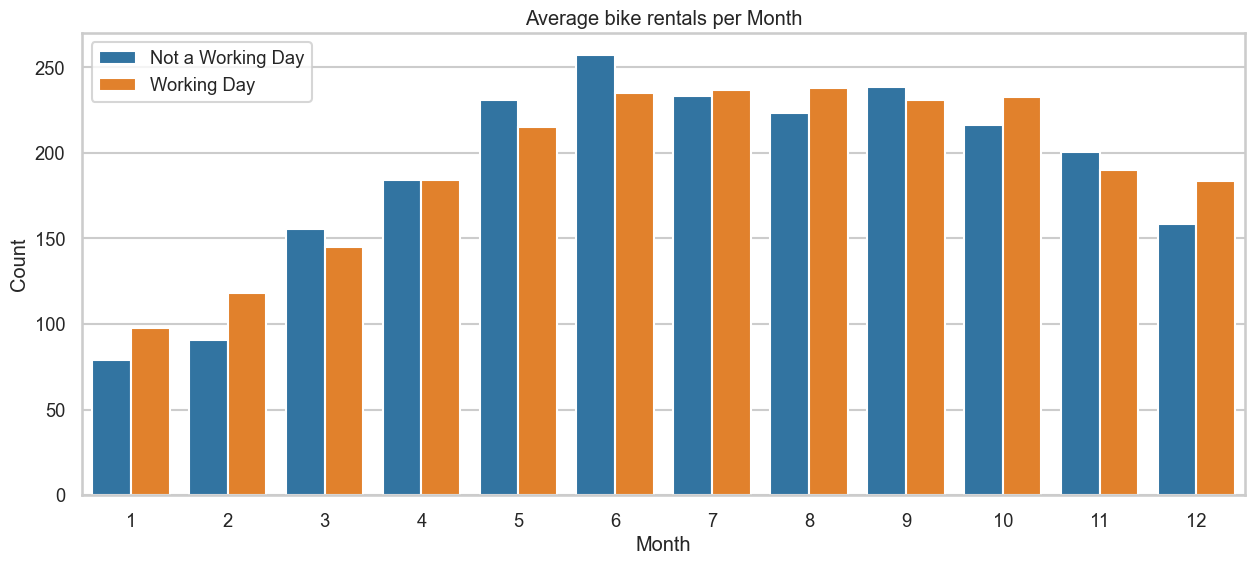

In [16]:
# Average Monthly Count Distribution plot
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
group_month = pd.DataFrame(mydata.groupby(['month', 'workingday'])['count'].mean()).reset_index()
sns.barplot(data=group_month, x='month', y='count', hue='workingday', ax=axes)
axes.set(xlabel='Month', ylabel='Count', title='Average bike rentals per Month')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
plt.show()

**Observations**
* Lesser number of outliers can be seen in the seaborn box plot across hours indicating that most of the outliers are due to highly varying distribution during the day
* Higher reservations can be seen at around 8am and 5pm (office hours) and close to 0 reservations very early in the morning
* From the above plot we can see the 2 patterns across the hours in a day in bike rentals
    * Working Day: First pattern where there is a peak in the rentals at around 8am and another at around 5pm. These correspond to working local bikers who typically are ``registered`` and go to work on ``working day`` which are ``Monday`` to ``Friday``
    * Non Working Day: Second pattern where there is more or less a uniform rentals across the day with a peak at around noon time. These correspond to probably tourists who typically are ``casual`` users who rent/drop off bikes uniformly during the day and tour the city of Washington on ``non working days`` which typically are ``Saturday`` and ``Sunday``
* Also, we can see that we have more bike rentals during the Fall (July to September) and Summer (April to June) Season.

## Outliers Analysis 

### Weather = 'Heavy Snow/Rain' outlier
We had earlier seen a single observation with 'Heavy Snow/Rain' recording. Let us extract that observation to see if it is an outlier and how we should handle that data point. 

In [17]:
heavy_weather_data = mydata.loc[mydata['weather']=='Heavy Snow/Rain', :]
print(heavy_weather_data.index)
mydata['2012-01-09 08:00' : '2012-01-09 20:00']

DatetimeIndex(['2012-01-09 18:00:00'], dtype='datetime64[ns]', name='datetime', freq=None)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,date,hour,day
datetime,,,,,,,,,,,,,,,
2012-01-09 08:00:00,Spring,0,1,Misty+Cloudy,9.02,12.880,55,6.0032,13,407,420,1,9,8,Monday
2012-01-09 09:00:00,Spring,0,1,Misty+Cloudy,9.02,13.635,64,0.0000,9,188,197,1,9,9,Monday
2012-01-09 10:00:00,Spring,0,1,Clear,9.84,14.395,60,0.0000,13,95,108,1,9,10,Monday
2012-01-09 11:00:00,Spring,0,1,Misty+Cloudy,10.66,14.395,56,6.0032,6,82,88,1,9,11,Monday
2012-01-09 12:00:00,Spring,0,1,Misty+Cloudy,10.66,13.635,56,7.0015,10,93,103,1,9,12,Monday
2012-01-09 13:00:00,Spring,0,1,Misty+Cloudy,10.66,13.635,56,7.0015,3,77,80,1,9,13,Monday
2012-01-09 14:00:00,Spring,0,1,Light Snow/Rain,9.02,11.365,75,11.0014,5,45,50,1,9,14,Monday
2012-01-09 15:00:00,Spring,0,1,Light Snow/Rain,9.02,11.365,75,11.0014,5,64,69,1,9,15,Monday
2012-01-09 16:00:00,Spring,0,1,Light Snow/Rain,9.02,12.880,87,6.0032,3,46,49,1,9,16,Monday


From the above data, it appears like the weather was indeed bad at 6pm. It was bright and sunny at 10am and slowly got bad (weather = Misty->Light Snow->Heavy Snow) towards the end of the day. Also, there were several registered users who got to work that morning (407 commuters @ 8am). This explains why there were 158 registered commuters even under the worst of the weather conditions 

Since there is just one occurence of Heavy Snow/Rain Condition, let us replace the Heavy Snow/Rain label to Light Snow/Rain. 

In [18]:
# Replacing Heavy/Snow Rain condition with Light Snow/Rain
mydata.loc[mydata['weather']=='Heavy Snow/Rain', 'weather'] = 'Light Snow/Rain'
testdata.loc[testdata['weather']=='Heavy Snow/Rain', 'weather'] = 'Light Snow/Rain'

mydata['2012-01-09 18:00' : '2012-01-09 18:00']

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,date,hour,day
datetime,,,,,,,,,,,,,,,
2012-01-09 18:00:00,Spring,0,1,Light Snow/Rain,8.2,11.365,86,6.0032,6,158,164,1,9,18,Monday


### Zscore >4 Pruning

Let us first take a look at the data entries with zscore > 4, i.e., data with more than 4 standard deviation away from the mean. 

In [19]:
# Function to calculate zscore
def zscore(series): 
    return (series-series.mean())/series.std()

mydata['count_zscore'] = mydata.groupby(['hour', 'workingday'])['count'].transform(zscore)
outlier_idx = np.abs(mydata['count_zscore'])>4
outlier_data = mydata.loc[outlier_idx, :]
print('Shape of the outlier data entries: ', outlier_data.shape)
outlier_data

Shape of the outlier data entries:  (15, 16)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,date,hour,day,count_zscore
datetime,,,,,,,,,,,,,,,,
2011-05-02 00:00:00,Summer,0,1,Clear,18.86,22.725,72,8.9981,68,109,177,5,2,0,Monday,5.328782
2011-05-02 01:00:00,Summer,0,1,Clear,18.86,22.725,72,8.9981,41,73,114,5,2,1,Monday,7.899886
2011-07-15 02:00:00,Fall,0,1,Clear,24.60,28.790,78,11.0014,16,22,38,7,15,2,Friday,4.248737
2012-04-01 06:00:00,Summer,0,0,Misty+Cloudy,14.76,17.425,76,8.9981,9,88,97,4,1,6,Sunday,4.227851
2012-04-16 06:00:00,Summer,1,0,Clear,21.32,25.000,83,11.0014,10,123,133,4,16,6,Monday,6.204331
2012-04-16 07:00:00,Summer,1,0,Clear,21.32,25.000,83,8.9981,20,367,387,4,16,7,Monday,7.784914
2012-04-16 08:00:00,Summer,1,0,Misty+Cloudy,22.96,26.515,83,11.0014,48,549,597,4,16,8,Monday,5.864166
2012-07-04 21:00:00,Fall,1,0,Clear,34.44,40.150,53,8.9981,222,362,584,7,4,21,Wednesday,4.970624
2012-07-04 22:00:00,Fall,1,0,Clear,33.62,39.395,56,15.0013,175,327,502,7,4,22,Wednesday,5.022732


All the outliers occur mostly early in the morning or late at night. Let us prune out these outliers. These could be due to some late night shows or holiday or some party. 

In [20]:
# Removing outliers from mydata
mydata_without_outliers = mydata.loc[~outlier_idx, :]
mydata.shape # Shape of data before outliner pruning
mydata_without_outliers.shape # Shape of data after outlier pruning

(10871, 16)

Dropping the zscore column from the data frame

In [21]:
# Dropping the zscore column
mydata_without_outliers = mydata_without_outliers.drop('count_zscore', axis=1)
mydata_without_outliers.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,date,hour,day
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,1,1,0,Saturday
2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,1,1,1,Saturday
2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,1,1,2,Saturday
2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,1,1,3,Saturday
2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,1,1,4,Saturday


## Correlation Analysis

### Regression Plots vs. Temperature, Humidity and Windspeed
Using seaborn to get regression plots with respect to Temperature, Humidity and Windspeed. 

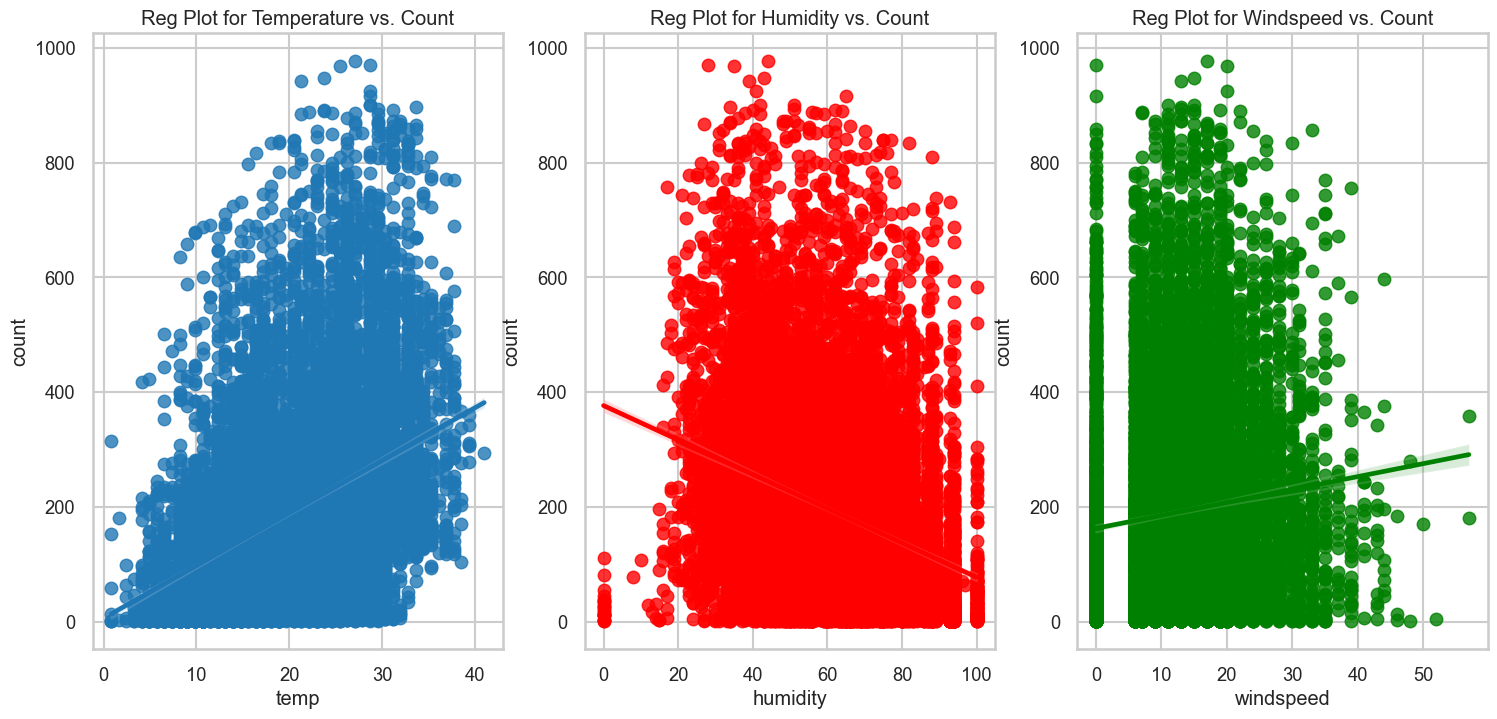

In [22]:
# Regression Plots with respect to Temperature, Humidity and Windspeed
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data=mydata_without_outliers, x='temp', y='count',ax=axes)
axes.set(title='Reg Plot for Temperature vs. Count')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=mydata_without_outliers, x='humidity', y='count',ax=axes, color='r')
axes.set(title='Reg Plot for Humidity vs. Count')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=mydata_without_outliers, x='windspeed', y='count',ax=axes, color='g')
axes.set(title='Reg Plot for Windspeed vs. Count')
plt.show()

**Observations**
* The above regplot indicates a positive correlation of count with temperature and windspeed and a negative correlation with humidity

### Heatmap Plot
Using heatmap plots of all the numerical features to obtain correlation of the bike rental with other numerical features 

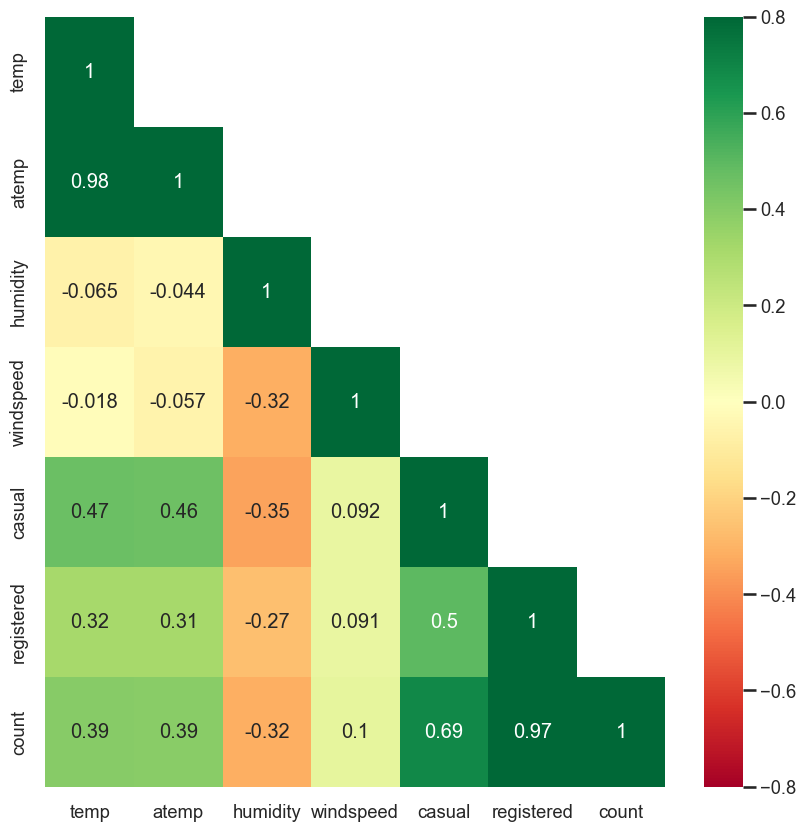

In [23]:
# Heatmap relative to all numeric columns
corr_matrix = mydata_without_outliers.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

fig = plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
plt.show()

**Inferences from the above heatmap**
* temp (true temperature) and atemp (feels like temperature) are highly correlated as expected
* count is highly correlated with casual and registered as expected since count = casual + registered
* We see a positive correlation between count and temperature (as was seen in the regplot). This is probably only true for the range of temperatures provided
* We see a negative correlation between count and humidity. The more the humidity, the less people prefer to bike
* Not a great amount of correlation between humidity and temperature, though
* Count has a weak dependence on windspeed

## Feature Engineering - continued.....

We have lots of categorical columns. We will transform each relevant and important categorical columns into binary vector columns. Later drop all the columns that are not required (redundant or very low correlation). 

**Summary of the column transformations**
* Season: Month column has a direct mapping with season (Winter: January to March, Summer: April to June, Fall: July to September and Spring: October to December). Hence we will drop season column
* Holiday and 'day': workingday = weekday and not a holiday. Since we noticed that there were two kinds of bike rental behavoirs - during working days and not a working day, we will retain only the workingday column and drop 'day' and 'holiday' column
* Workingday: After observing the bike rental trend, we propose to build 2 separate models for 1. if it is a working day, and 2. if it is a non-working day. Hence, we can separate out the data based on  this column and drop the column
* Weather: Split weather column to weather_1, weather_2 and weather 3 (recall that we had relabelled all the weather = 4 data points to weather = 3 due to its sparseness). Drop weather_3 since it is a function of the rest of the weather columns
* Temp: temp and atemp are highly correlated. Hence retain only the temp column 
* Windspeed: Very poorly correlated with count. Hence drop this column
* Casual and registered: These are individual components of our to be predicted column (count). Hence drop these columns
* Month: Split month column to month_1, month_2, ..., month_12. Drop month_12 since it is a function of the rest of the month columns
* Date: Intuitively, there is should be no dependency on date. Hence drop this column
* Hour: Split hour column to hour_0, hour_1, ..., hour_23. Drop hour_23 since it is a function of the rest of the hour columns


In [24]:
# Using numbers to represent categorical data to transform the categorical columns
season_inv_dict = {'Spring':1, 'Summer':2, 'Fall':3, 'Winter':4}
weather_inv_dict = {'Clear':1, 'Misty+Cloudy':2, 'Light Snow/Rain':3, 'Heavy Snow/Rain':4}
day_inv_dict = {'Monday':0, 'Teusday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}

mydata_without_outliers['season'] = mydata_without_outliers['season'].map(season_inv_dict)
mydata_without_outliers['weather'] = mydata_without_outliers['weather'].map(weather_inv_dict)
mydata_without_outliers['day'] = mydata_without_outliers['day'].map(day_inv_dict)

testdata['season'] = testdata['season'].map(season_inv_dict)
testdata['weather'] = testdata['weather'].map(weather_inv_dict)
testdata['day'] = testdata['day'].map(day_inv_dict)

# Dropping columns from the provided data set that are either highly correlated with the existing columns: 
# season with month, holiday and day with workingday, temp with atemp
# or poorly correlated with the target column: windspeed and date
drop_columns_1 = ['season', 'holiday', 'atemp', 'windspeed', 'date', 'day']
mydata_without_outliers = mydata_without_outliers.drop(drop_columns_1, axis=1)
testdata = testdata.drop(drop_columns_1, axis=1)
mydata_without_outliers.head()

,workingday,weather,temp,humidity,casual,registered,count,month,hour
datetime,,,,,,,,,
2011-01-01 00:00:00,0,1,9.84,81,3,13,16,1,0
2011-01-01 01:00:00,0,1,9.02,80,8,32,40,1,1
2011-01-01 02:00:00,0,1,9.02,80,5,27,32,1,2
2011-01-01 03:00:00,0,1,9.84,75,3,10,13,1,3
2011-01-01 04:00:00,0,1,9.84,75,0,1,1,1,4


Transforming all the categorical columns into binary columns...

In [25]:
# Transforming all the categorical columns into binary columns
month=pd.get_dummies(mydata_without_outliers['month'], prefix='month')
weather=pd.get_dummies(mydata_without_outliers['weather'], prefix='weather')
hour=pd.get_dummies(mydata_without_outliers['hour'], prefix='hour')
mydata_train=pd.concat([mydata_without_outliers, weather, month, hour],axis=1)

month=pd.get_dummies(testdata['month'], prefix='month')
weather=pd.get_dummies(testdata['weather'], prefix='weather')
hour=pd.get_dummies(testdata['hour'], prefix='hour')
mydata_test=pd.concat([testdata, weather, month, hour],axis=1)

mydata_train.columns

Index(['workingday', 'weather', 'temp', 'humidity', 'casual', 'registered',
       'count', 'month', 'hour', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

Dropping columns and the last binary vector column (which are fully correlated and can be expressed as a function of other columns)

In [26]:
# Dropping columns and the last binary vector column 
drop_columns_2 = ['weather', 'month', 'hour', 'weather_3', 'month_12', 'hour_23']

mydata_train = mydata_train.drop(drop_columns_2+['casual', 'registered'], axis=1)
mydata_test = mydata_test.drop(drop_columns_2, axis=1)
mydata_without_outliers = mydata_without_outliers.drop(['casual', 'registered'], axis=1)

mydata_train.columns

Index(['workingday', 'temp', 'humidity', 'count', 'weather_1', 'weather_2',
       'weather_4', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22'],
      dtype='object')

# MODELLING

Since the bike rental trend is quite different between working and non-working day, we try the following two ways to solve this problem
1. Build 2 separate models - 1. for working day, and 2. for non-working day.  
2. Build a single model using workingday as one of the features


## Data and Function Definition

### Train/Validation/Test Split

First split the labelled data provided into internal training and testing set. Kaggle has held out data from 20th to the end of the month (for every month) as test set. Following a similar approach, split the labelled data (mydata_train) into 
1. Training set, model_train
    * This will contain data of from the 1st to 15th of every month 
    * This will be used to train our model
2. Testing set, model_test
    * This will contain data from 16th to 19th of every month 
    * This will be used to test our model

The final test data for which labels (count) have not been provided corresponds to 20th to the end of every month

In [27]:
model_train, model_test = mydata_train[mydata_train.index.day<15], mydata_train[mydata_train.index.day>=15]
model_train2, model_test2 = mydata_without_outliers[mydata_without_outliers.index.day<15], mydata_without_outliers[mydata_without_outliers.index.day>=15]

# Separating out the working an non-working data from the training set 
model_train_w = model_train[model_train['workingday']==1]
model_train_nw = model_train[model_train['workingday']==0]
model_train2_w = model_train2[model_train2['workingday']==1]
model_train2_nw = model_train2[model_train2['workingday']==0]

model_test_w = model_test[model_test['workingday']==1]
model_test_nw = model_test[model_test['workingday']==0]
model_test2_w = model_test2[model_test2['workingday']==1]
model_test2_nw = model_test2[model_test2['workingday']==0]

# Dropping workingday column 
model_train_w = model_train_w.drop('workingday', axis=1)
model_train_nw = model_train_nw.drop('workingday', axis=1)
model_train2_w = model_train2_w.drop('workingday', axis=1)
model_train2_nw = model_train2_nw.drop('workingday', axis=1)

model_test_w = model_test_w.drop('workingday', axis=1)
model_test_nw = model_test_nw.drop('workingday', axis=1)
model_test2_w = model_test2_w.drop('workingday', axis=1)
model_test2_nw = model_test2_nw.drop('workingday', axis=1)

In [28]:
# Contains Binary Vector Form of features (Obtained from OneHotEncoder transformed categorical feature)
X, X_w, X_nw = model_train.drop('count', axis=1), model_train_w.drop('count', axis=1), model_train_nw.drop('count', axis=1)
y, y_w, y_nw = model_train['count'], model_train_w['count'], model_train_nw['count']
logy, logy_w, logy_nw = np.log1p(y), np.log1p(y_w), np.log1p(y_nw)

Xtest, Xtest_w, Xtest_nw = model_test.drop('count', axis=1), model_test_w.drop('count', axis=1), model_test_nw.drop('count', axis=1)
ytest, ytest_w, ytest_nw = model_test['count'], model_test_w['count'], model_test_nw['count']
logytest, logytest_w, logytest_nw = np.log1p(y), np.log1p(y_w), np.log1p(y_nw)

# Contains Categorical features instead of the Binary Vector Form
X2, X2_w, X2_nw = model_train2.drop('count', axis=1), model_train2_w.drop('count', axis=1), model_train2_nw.drop('count', axis=1)
y2, y2_w, y2_nw = model_train2['count'], model_train2_w['count'], model_train2_nw['count']
logy2, logy2_w, logy2_nw = np.log1p(y2), np.log1p(y2_w), np.log1p(y2_nw)

Xtest2, Xtest2_w, Xtest2_nw = model_test2.drop('count', axis=1), model_test2_w.drop('count', axis=1), model_test2_nw.drop('count', axis=1)
ytest2, ytest2_w, ytest2_nw = model_test2['count'], model_test2_w['count'], model_test2_nw['count']
logytest2, logytest2_w, logytest2_nw = np.log1p(y), np.log1p(y_w), np.log1p(y_nw)

# Data Frame to store all the RMSLE scores for various algorithms
algo_score = pd.DataFrame()
algo_score.index.name = 'Modelling Algo'
algo_score['Train RMSLE (Working Day)'] = None
algo_score['Train RMSLE (Non Working Day)'] = None
algo_score['Train RMSLE (Average)'] = None
algo_score['Test RMSLE (Working Day)'] = None
algo_score['Test RMSLE (Non Working Day)'] = None
algo_score['Test RMSLE (Average)'] = None
algo_score['Validation RMSLE (Working Day)'] = None
algo_score['Validation RMSLE (Non Working Day)'] = None
algo_score['Validation RMSLE (Average)'] = None
algo_score['Hyperparameters-Working'] = None
algo_score['Hyperparameters-Non Working'] = None
algo_score['Training+Test Time (sec)'] = None
cv_time = []

# Data Frame for second level of prediction. Collect the predicted y values for training and test set of data
ypred_train = pd.DataFrame(index = X.index)
ypred_test = pd.DataFrame(index = Xtest.index)
ypred_train['count'], ypred_test['count'] = y, ytest 

### Function Definitions
Let us define few functions which we would call for every model

**`rmsle` and `rmsle_log`**: These are RMSLE (Root Mean Square Log Error) functions which will be used as our scoring function (also used by Kaggle)

In [29]:
from sklearn.metrics import make_scorer

# Metric used to measure the model (Root Mean Square Log Error)
def rmsle(y_actual, y_pred):
    log1 = np.nan_to_num(np.array([np.log1p(v) for v in y_pred]))
    log2 = np.nan_to_num(np.array([np.log1p(v) for v in y_actual]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

# RMSLE function with inputs in log form. Used for CrossValidation scoring
def rmsle_log(logy_actual, logy_pred):
    calc = (logy_actual - logy_pred) ** 2
    return np.sqrt(np.mean(calc))
rmsle_cv = make_scorer(rmsle_log, greater_is_better=False)


**`plot_true_vs_pred`**: This is used to plot True and Predicted count values for a particular time interval

In [30]:
# Plots True vs. Predictied count values in a particular time interval
def plot_true_vs_pred (y_w_actual, y_nw_actual, y_w_pred, y_nw_pred, algo, t_from, t_to):
    fig = plt.figure(figsize=(18, 16))
    
    # Working day plot
    axes = fig.add_subplot(2, 1, 1)
    axes.plot(y_w_actual[t_from:t_to], label='Actual', marker='.', markersize=15)
    axes.plot(y_w_pred[t_from:t_to], label='Predicted', marker='.', markersize=15)
    axes.set(xlabel='Time', ylabel='Count', title='{0} Model for Working Day: Count between time {1} and {2}'.format(algo, t_from, t_to))
    axes.legend()

    # Non working day plot
    axes = fig.add_subplot(2, 1, 2)
    axes.plot(y_nw_actual[t_from:t_to], label='Actual', marker='.', markersize=15)
    axes.plot(y_nw_pred[t_from:t_to], label='Predicted', marker='.', markersize=15)
    axes.set(xlabel='Time', ylabel='Count', title='{0} Model for Non Working Day: Count between time {1} and {2}'.format(algo, t_from, t_to))
    axes.legend()
    plt.show()

**`model_fit`**: Since we will be trying out various models to figure out which works best, let us customize a fit and predict function which will fit the trainging data and predict on the test data and return the required metrics.  
The below function can fit/predict training and testing data for one of these two cases 
1. working and non-working days or 
2. combined working and non-working days. 

The output returned by the function are 
1. rmsle for training, test data for working, non-working and combined 
2. predicted y for training, test for working/non-working or combined


In [31]:
# Customized Function to fit/predict training and testing data for:
# 1. working and non-working days or 2. combined working and non-working days
# Output: 1. rmsle for training, test data for working, non-working and combined 
#         2. predicted y for training, test for working/non-working or combined
def model_fit (model_w, X_tr_w, X_t_w, y_tr_w, y_t_w, model_nw=None, X_tr_nw=None, X_t_nw=None, y_tr_nw=None, y_t_nw=None):
    ''' Case 1: If separate models for Working day and non-working day
    model_w, model_nw = Models for Working and non-working days, respectively
    X_tr_w, y_tr_w = Training data set for Working days
    X_t_w, y_t_w = Testing data set for Working days
    X_tr_nw, y_tr_nw = Training data set for Non Working days
    X_t_nw, y_t_nw = Testing data set for Non Working days 
    
    Case 2: If single model for working day and non-working day 
    model_w = Single Model for Working and non-working days
    X_tr_w, y_tr_w = Training data set containing both Working and non-working days (feature list must contain 'workingday')
    X_t_w, y_t_w = Testing data set containing both Working and non-working days'''
    
    # Working Day Modeling of Single Model for Working and Non-Working Day
    model_w.fit(X_tr_w, np.log1p(y_tr_w))
    logy_tr_w_predict = model_w.predict(X_tr_w)
    logy_t_w_predict = model_w.predict(X_t_w)
    
    y_tr_w_predict = np.expm1(logy_tr_w_predict)
    y_t_w_predict = np.expm1(logy_t_w_predict)
    
    rmsle_w_tr = rmsle(y_tr_w, y_tr_w_predict)
    rmsle_w_t = rmsle(y_t_w, y_t_w_predict)
    
    if model_nw is None:
        # Single Model for working and non-working days. The feature list in X should have workingday column
        [rmsle_avg_tr, rmsle_avg_t] = [rmsle_w_tr, rmsle_w_t] # The RMSLE computed by the first model is the overall RMSLE
        rmsle_w_tr = rmsle(y_tr_w[X_tr_w.workingday==1], y_tr_w_predict[X_tr_w.workingday==1])
        rmsle_nw_tr = rmsle(y_tr_w[X_tr_w.workingday==0], y_tr_w_predict[X_tr_w.workingday==0])
        rmsle_w_t = rmsle(y_t_w[X_t_w.workingday==1], y_t_w_predict[X_t_w.workingday==1])
        rmsle_nw_t = rmsle(y_t_w[X_t_w.workingday==0], y_t_w_predict[X_t_w.workingday==0])
        y_tr_nw_predict, y_t_nw_predict = None, None
    else:
        # Non-working day Modeling
        model_nw.fit(X_tr_nw, np.log1p(y_tr_nw))
        logy_tr_nw_predict = model_nw.predict(X_tr_nw)
        logy_t_nw_predict = model_nw.predict(X_t_nw)

        y_tr_nw_predict = np.expm1(logy_tr_nw_predict)
        y_t_nw_predict = np.expm1(logy_t_nw_predict)

        rmsle_nw_tr = rmsle(y_tr_nw, y_tr_nw_predict)
        rmsle_nw_t = rmsle(y_t_nw, y_t_nw_predict)

        # Combined RMSLE
        [rmsle_avg_tr, rmsle_avg_t] = [rmsle(np.concatenate([y_tr_w, y_tr_nw]), np.concatenate([y_tr_w_predict, y_tr_nw_predict])), 
                                       rmsle(np.concatenate([y_t_w, y_t_nw]), np.concatenate([y_t_w_predict, y_t_nw_predict]))]
    
    rmsle_all = [rmsle_w_tr, rmsle_nw_tr, rmsle_avg_tr, rmsle_w_t, rmsle_nw_t, rmsle_avg_t]
    y_pred_all = [y_tr_w_predict, y_t_w_predict, y_tr_nw_predict, y_t_nw_predict]
    
    return(rmsle_all, y_pred_all)
    

**`cros_val`**: This function is used to split the data into cv folds, train on cv-1 folds, test on the left out fold and most importantly save the predicted values of the left out fold. THese predictions are used as inputs for stacking.  
The 5 folds used are - (1, 3), (4, 6), (7, 9), (10, 12) and (13, 15) of every month

In [32]:
def cross_val(model_w, X_in_w, y_in_w, model_nw=None, X_in_nw=None, y_in_nw=None, cv=5):
    y_val_pred_w = pd.Series(index=y_in_w.index)
    y_val_pred_nw = None if model_nw == None else pd.Series(index=y_in_nw.index)
    for idx in range(cv):
        from_, to_ = idx*15/cv, (idx+1)*15/cv
        
        val_idx_w = (X_in_w.index.day>from_) & (X_in_w.index.day<=to_)
        train_idx_w = ~val_idx_w
        
        X_idx_w, y_idx_w, X_val_idx_w = X_in_w[train_idx_w], y_in_w[train_idx_w], X_in_w[val_idx_w]
        model_w.fit(X_idx_w, np.log1p(y_idx_w))
        logy_val_pred_idx_w = model_w.predict(X_val_idx_w)
        y_val_pred_w[val_idx_w] = np.expm1(logy_val_pred_idx_w)
        
        if model_nw is not None:
            val_idx_nw = (X_in_nw.index.day>from_) & (X_in_nw.index.day<=to_)
            train_idx_nw = ~val_idx_nw
            
            X_idx_nw, y_idx_nw, X_val_idx_nw = X_in_nw[train_idx_nw], y_in_nw[train_idx_nw], X_in_nw[val_idx_nw]
            model_nw.fit(X_idx_nw, np.log1p(y_idx_nw))
            logy_val_pred_idx_nw = model_nw.predict(X_val_idx_nw)
            y_val_pred_nw[val_idx_nw] = np.expm1(logy_val_pred_idx_nw)
    
    if model_nw is None: 
        rmsle_avg = rmsle(y_in_w, y_val_pred_w)
        rmsle_w = rmsle(y_in_w[X_in_w.workingday==1], y_val_pred_w[X_in_w.workingday==1])
        rmsle_nw = rmsle(y_in_w[X_in_w.workingday==0], y_val_pred_w[X_in_w.workingday==0])
    else:
        rmsle_w = rmsle(y_in_w, y_val_pred_w)
        rmsle_nw = rmsle(y_in_nw, y_val_pred_nw)
        rmsle_avg = rmsle(np.concatenate([y_in_w, y_in_nw]), np.concatenate([y_val_pred_w, y_val_pred_nw]))
    
    rmsle_all = [rmsle_w, rmsle_nw, rmsle_avg]
    y_pred_all =[y_val_pred_w, y_val_pred_nw]
    return(rmsle_all, y_pred_all)

**`stack_model_fit`**: This function is used to fit and predict data sets for stacking models. These use the predicted values from individual models as inputs/features to train a new model

In [33]:
# Linear Regressor Ensemble for the above 3 models
def stack_model_fit (model, X_tr, X_t, y_tr, y_t):
    model.fit(X_tr, y_tr)
    y_tr_pred = model.predict(X_tr)
    y_t_pred = model.predict(X_t)
    
    [rmsle_avg_tr, rmsle_avg_t] = rmsle(y_tr, y_tr_pred), rmsle(y_t, y_t_pred)
    
    y_tr_w_pred, y_tr_nw_pred = y_tr_pred[X.workingday==1], y_tr_pred[X.workingday==0]
    y_t_w_pred, y_t_nw_pred = y_t_pred[Xtest.workingday==1], y_t_pred[Xtest.workingday==0]
    y_tr_w, y_tr_nw = y_tr[X.workingday==1], y_tr[X.workingday==0]
    y_t_w, y_t_nw = y_t[Xtest.workingday==1], y_t[Xtest.workingday==0]
    
    rmsle_w_tr, rmsle_nw_tr = rmsle(y_tr_w, y_tr_w_pred), rmsle(y_tr_nw, y_tr_nw_pred)
    rmsle_w_t, rmsle_nw_t = rmsle(y_t_w, y_t_w_pred), rmsle(y_t_nw, y_t_nw_pred)
    
    rmsle_all = [rmsle_w_tr, rmsle_nw_tr, rmsle_avg_tr, rmsle_w_t, rmsle_nw_t, rmsle_avg_t]
    y_pred_all = [y_tr_pred, y_t_pred]
    
    return(rmsle_all, y_pred_all)


## Linear Regression

**Model Fit+Predict**

In [34]:
from sklearn.linear_model import LinearRegression
lreg_w, lreg_nw = LinearRegression(), LinearRegression()

param_summary = ['', '', '']

rmsle_summary, y_predict_summary = model_fit(lreg_w, X_w, Xtest_w, y_w, ytest_w, lreg_nw, X_nw, Xtest_nw, y_nw, ytest_nw)
ypred_test.loc[Xtest.workingday==1,'LR'], ypred_test.loc[Xtest.workingday==0,'LR'] = y_predict_summary[1], y_predict_summary[3]

In [35]:
rmsle_val_summary, y_predict_val_summary = cross_val(lreg_w, X_w, y_w, lreg_nw, X_nw, y_nw)
ypred_train.loc[X.workingday==1,'LR'], ypred_train.loc[X.workingday==0,'LR'] = y_predict_val_summary[0], y_predict_val_summary[1]

algo_score.loc['Linear Regression'] = rmsle_summary+rmsle_val_summary+param_summary
algo_score.loc[['Linear Regression']]

,Train RMSLE (Working Day),Train RMSLE (Non Working Day),Train RMSLE (Average),Test RMSLE (Working Day),Test RMSLE (Non Working Day),Test RMSLE (Average),Validation RMSLE (Working Day),Validation RMSLE (Non Working Day),Validation RMSLE (Average),Hyperparameters-Working,Hyperparameters-Non Working,Training+Test Time (sec)
Modelling Algo,,,,,,,,,,,,
Linear Regression,0.418155,0.432817,0.422797,0.390881,0.495181,0.428666,0.430658,0.474808,0.444944,,,


In [36]:
algo_score.loc['Linear Regression', 'Training+Test Time (sec)'] = 0.197
cv_time.append(0.237)

**Observations**
* Not an overfit model - both train and test RMSLE are more or less similar
* A good initial model

**Prediction Plot for Test data in a month (last 5 days of a month)**

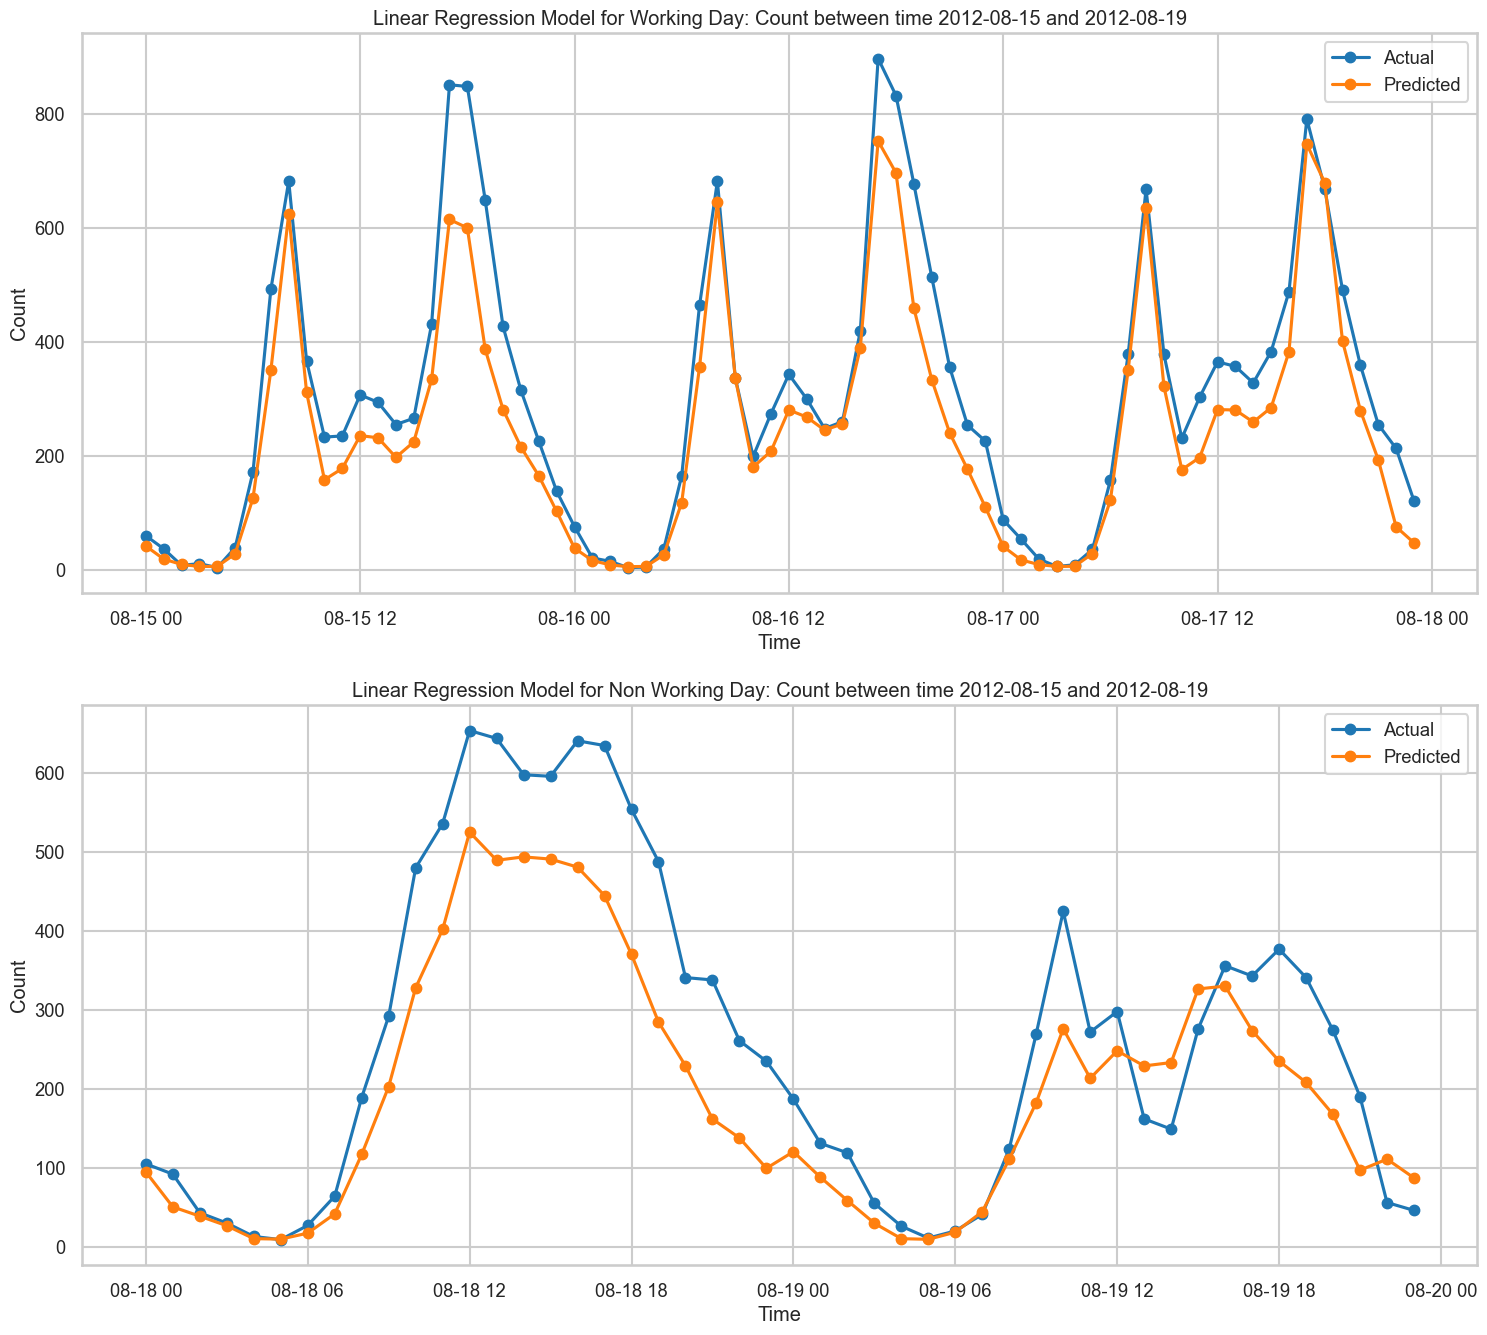

In [37]:
# Linear Regression Plot: True vs. Predicted for one week 
t_from, t_to = '2012-08-15', '2012-08-19'
ytest_w_predict, ytest_nw_predict = y_predict_summary[1], y_predict_summary[3]
ytest_w_predict = pd.Series(ytest_w_predict, index = ytest_w.index)
ytest_nw_predict = pd.Series(ytest_nw_predict, index = ytest_nw.index)

plot_true_vs_pred(ytest_w, ytest_nw, ytest_w_predict, ytest_nw_predict, 'Linear Regression', t_from, t_to)

Storing the regression coefficents for comparison later...

In [38]:
# Features and the Estimated Linear Regression Coefficients obtained for Working day and Non-working day models
df_coeff = pd.DataFrame({'features': X_w.columns, 'Lin_Coeff_Working': lreg_w.coef_, 'Lin_Coeff_Non_Working': lreg_nw.coef_})

**Observations**
* We see marginal gain (Test RMSLE reduced to 0.43 from 0.44) over the linear models